In [17]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display
import pandas

In [18]:
def readAudio(audiofilename):
    sig , sr = librosa.load(audiofilename,mono=True,sr=None)
    return sig, sr

In [19]:
def mergeAudio(sig,onsets,sr):
    samp = np.zeros(len(sig))
    sampLoc=librosa.time_to_samples(onsets.values, sr=sr)
    samp[sampLoc]=1
    newSig=np.zeros((len(sig),2))
    newSig[:,0]=samp
    newSig[:,1]=sig
    meanNewSig=np.mean(newSig,1)
    
    return meanNewSig

   



In [20]:
def plotOnsets(sig,onsetfilename,dffilename, name):
    onset = pandas.read_csv(onsetfilename,header=None)
    df = pandas.read_csv(dffilename,header=None)
    times = onset.loc[:,0]
    D = np.abs(librosa.stft(sig,n_fft=4096))
    plt.figure()
    ax1 = plt.subplot(2, 1, 1)
    librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), x_axis='time', y_axis='log')
    title = "Onset Estimates for " + name
    plt.title(title)
    plt.subplot(2, 1, 2, sharex=ax1)
    plt.vlines(times, 0, 1, color='r', alpha=0.9, linestyle='--', label='Onsets')
    plt.plot(df.loc[:,0],df.loc[:,1], label = "Detection Function")
    plt.axis('tight')
    plt.legend(frameon=True, framealpha=0.75)
   
    
    
    return  times
    

In [21]:
def plotEnergies(sig,loudnesscsv,intensitycsv,rmscsv,name):
    loudnessdf = pandas.read_csv(loudnesscsv,header=None)
    loudnessVals = loudnessdf.values
    intensitydf = pandas.read_csv(intensitycsv,header=None)
    intensityVals = intensitydf.values
    rmsdf = pandas.read_csv(rmscsv,header=None) 
    rmsVals = rmsdf.values
    D = np.abs(librosa.stft(sig,n_fft=4096))
    plt.figure()
    librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), x_axis='time', y_axis='log',cmap='gray')
    plt.hold
    plt.plot(loudnessVals[:,0],loudnessVals[:,1]*100,color = 'r')
    plt.plot(intensityVals[:,0],intensityVals[:,1],color = 'c')
    plt.plot(rmsVals[:,0],rmsVals[:,1]*1000,color = 'g')
    title = "Loudness-related estimates for " + name
    plt.title(title)

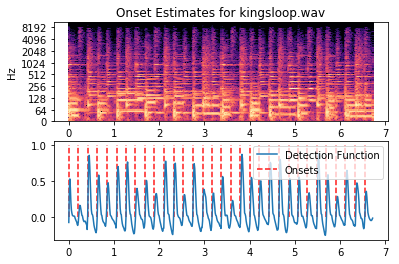

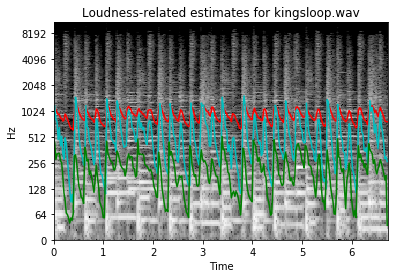

In [22]:
kingsSig, sr = readAudio('kingsloop.wav')
kingstimes = plotOnsets(kingsSig,'kingsLoop_vamp_qm-vamp-plugins_qm-onsetdetector_onsets.csv','kingsLoop_vamp_qm-vamp-plugins_qm-onsetdetector_smoothed_df.csv', 'kingsloop.wav')
kingsNewSig = mergeAudio(kingsSig,kingstimes,sr)
plotEnergies(kingsSig,'kingsLoop_vamp_vamp-libxtract_loudness_loudness.csv','kingsLoop_vamp_bbc-vamp-plugins_bbc-intensity_intensity.csv', 'kingsLoop_vamp_bbc-vamp-plugins_bbc-energy_rmsenergy.csv', 'kingsloop.wav')
IPython.display.Audio(data=kingsNewSig, rate=sr)


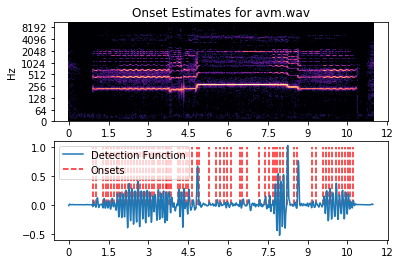

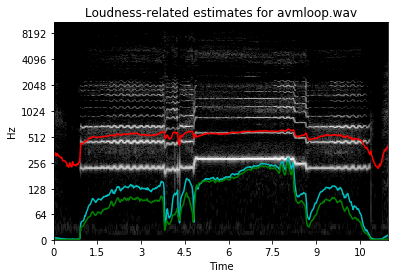

In [23]:
avmSig, sr1 = readAudio('avm.wav')
avmtimes = plotOnsets(avmSig,'avm_vamp_qm-vamp-plugins_qm-onsetdetector_onsets.csv','avm_vamp_qm-vamp-plugins_qm-onsetdetector_smoothed_df.csv', 'avm.wav')
avmNewSig = mergeAudio(avmSig,avmtimes,sr1)
plotEnergies(avmSig,'avm_vamp_vamp-libxtract_loudness_loudness.csv','avm_vamp_bbc-vamp-plugins_bbc-intensity_intensity.csv', 'avm_vamp_bbc-vamp-plugins_bbc-energy_rmsenergy.csv', 'avmloop.wav')
IPython.display.Audio(data=avmNewSig, rate=sr1)

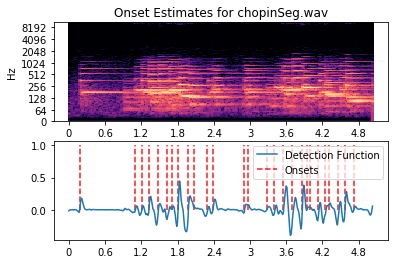

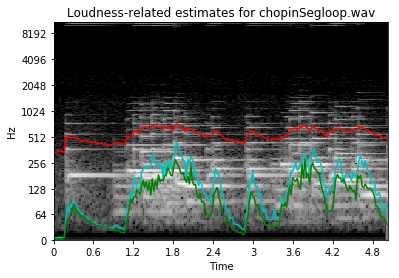

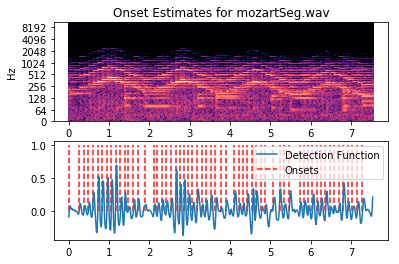

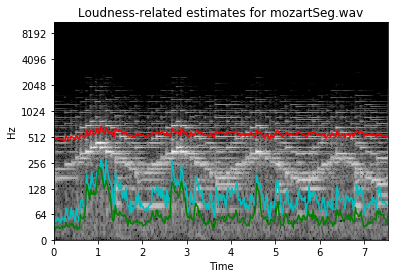

In [26]:
mozartSegSig, sr2 = readAudio('mozartSeg.wav')
mozartSegtimes = plotOnsets(mozartSegSig,'mozartSeg_vamp_qm-vamp-plugins_qm-onsetdetector_onsets.csv','mozartSeg_vamp_qm-vamp-plugins_qm-onsetdetector_smoothed_df.csv', 'mozartSeg.wav')
mozartSegNewSig = mergeAudio(mozartSegSig,mozartSegtimes,sr2)
plotEnergies(mozartSegSig,'mozartSeg_vamp_vamp-libxtract_loudness_loudness.csv','mozartSeg_vamp_bbc-vamp-plugins_bbc-intensity_intensity.csv', 'mozartSeg_vamp_bbc-vamp-plugins_bbc-energy_rmsenergy.csv', 'mozartSeg.wav')
IPython.display.Audio(data=mozartSegNewSig, rate=sr2)

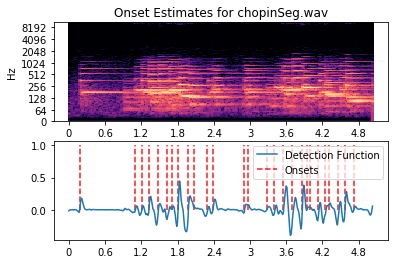

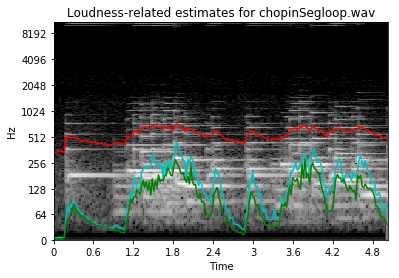

In [25]:
chopinSegSig, sr3 = readAudio('chopinSeg.wav')
chopinSegtimes = plotOnsets(chopinSegSig,'chopinSeg_vamp_qm-vamp-plugins_qm-onsetdetector_onsets.csv','chopinSeg_vamp_qm-vamp-plugins_qm-onsetdetector_smoothed_df.csv', 'chopinSeg.wav')
chopinSegNewSig = mergeAudio(chopinSegSig,chopinSegtimes,sr3)
plotEnergies(chopinSegSig,'chopinSeg_vamp_vamp-libxtract_loudness_loudness.csv','chopinSeg_vamp_bbc-vamp-plugins_bbc-intensity_intensity.csv', 'chopinSeg_vamp_bbc-vamp-plugins_bbc-energy_rmsenergy.csv', 'chopinSegloop.wav')
IPython.display.Audio(data=chopinSegNewSig, rate=sr3)
